# Women's Mental Health Sentiment Analysis

This notebook analyzes social media posts related to women's mental health using sentiment analysis and emotion classification. We'll use:
- TextBlob for sentiment analysis
- Pandas for data handling
- Matplotlib for visualization

## Import Required Libraries

In [1]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt

## Load and Preview Data

In [3]:
# Load sample data
df = pd.read_csv('data/sample_women_mental_health_tweets.csv')

# Display first few tweets
print("Sample Tweets:")
print("-------------")
print(df.head())

Sample Tweets:
-------------
                                               tweet
0  Feeling overwhelmed with work and family, but ...
1  Postpartum anxiety is real and not talked abou...
2  Grateful for my support group. Women supportin...
3  Struggling with body image lately. Social medi...
4  Therapy has helped me so much on my mental hea...


## Define Emotion Classification Functions

In [4]:
def get_sentiment(text):
    """Calculate sentiment score using TextBlob"""
    blob = TextBlob(text)
    return blob.sentiment.polarity

def get_emotion_category(text, score):
    """Categorize text into one of the five universal emotions"""
    # Keywords for each emotion
    emotion_keywords = {
        'Joy': ['grateful', 'hopeful', 'celebrating', 'proud', 'peace', 'happy', 'positive', 'hope', 'glad'],
        'Sadness': ['depression', 'isolating', 'struggling', 'overwhelmed', 'sad', 'lonely', 'crushed'],
        'Fear': ['anxiety', 'stress', 'worried', 'panic', 'fear', 'scared', 'nervous'],
        'Anger': ['toxic', 'pressure', 'triggered', 'frustrated', 'angry', 'mad'],
        'Disgust': ['hate', 'sick', 'disgust', 'awful', 'terrible']
    }
    
    text = text.lower()
    emotion_counts = {emotion: 0 for emotion in emotion_keywords}
    
    # Count keyword matches for each emotion
    for emotion, keywords in emotion_keywords.items():
        for keyword in keywords:
            if keyword in text:
                emotion_counts[emotion] += 1
    
    # If we found emotion keywords, use the most frequent one
    max_count = max(emotion_counts.values())
    if max_count > 0:
        # If there's a tie, use sentiment score to break it
        max_emotions = [e for e, c in emotion_counts.items() if c == max_count]
        if len(max_emotions) == 1:
            return max_emotions[0]
        else:
            # Use sentiment score to break ties
            if score > 0.2:
                return 'Joy' if 'Joy' in max_emotions else max_emotions[0]
            elif score < -0.2:
                return next((e for e in max_emotions if e != 'Joy'), max_emotions[0])
    
    # If no keywords found, use sentiment score
    if score > 0.2:
        return 'Joy'
    elif score < -0.2:
        return 'Sadness'
    else:
        return 'Neutral'

## Analyze Sentiments and Emotions

In [5]:
# Apply sentiment analysis
df['sentiment_score'] = df['tweet'].apply(get_sentiment)
df['emotion'] = df.apply(lambda row: get_emotion_category(row['tweet'], row['sentiment_score']), axis=1)

# Display results
print("=== Emotion Analysis Results ===")
print("\nDetailed Analysis:")
print(df[['tweet', 'sentiment_score', 'emotion']])

# Calculate summary statistics
print("\n=== Summary Statistics ===")
print(f"\nTotal tweets analyzed: {len(df)}")
emotion_counts = df['emotion'].value_counts()
print("\nEmotion Distribution:")
for emotion, count in emotion_counts.items():
    percentage = (count / len(df)) * 100
    print(f"{emotion}: {count} tweets ({percentage:.1f}%)")

=== Emotion Analysis Results ===

Detailed Analysis:
                                                tweet  sentiment_score  \
0   Feeling overwhelmed with work and family, but ...         0.227273   
1   Postpartum anxiety is real and not talked abou...         0.100000   
2   Grateful for my support group. Women supportin...         0.312500   
3   Struggling with body image lately. Social medi...        -0.033333   
4   Therapy has helped me so much on my mental hea...        -0.100000   
5   Finally found a medication that works for my a...         0.000000   
6   The pressure to be a perfect mom, wife, and pr...         0.500000   
7   Started meditation last month and it's making ...         0.000000   
8   Depression during pregnancy is so isolating. W...         0.500000   
9   Celebrating 6 months of regular self-care rout...         0.041667   
10  Having a bad anxiety day, but my online commun...        -0.700000   
11  Work stress triggered my depression again, but...      

## Visualize Emotion Distribution

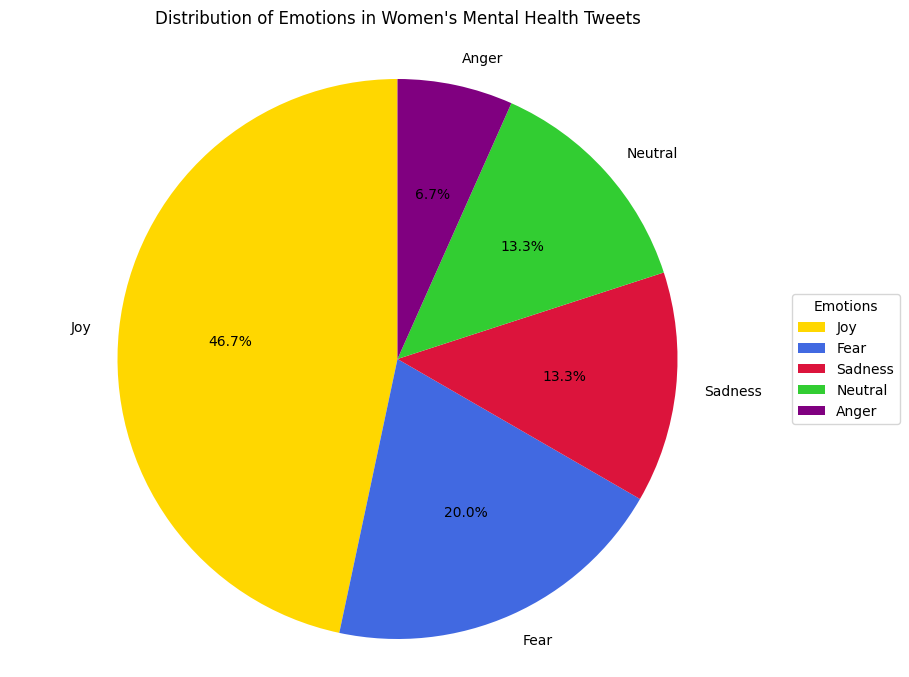

In [6]:
# Create a pie chart
plt.figure(figsize=(10, 8))
colors = ['#FFD700', '#4169E1', '#DC143C', '#32CD32', '#800080', '#808080']  # Colors for each emotion
plt.pie(emotion_counts.values, labels=emotion_counts.index, autopct='%1.1f%%', 
        colors=colors, startangle=90)

plt.title('Distribution of Emotions in Women\'s Mental Health Tweets', pad=20)

# Add a legend
plt.legend(emotion_counts.index, title="Emotions", 
          loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Ensure the pie chart is circular
plt.axis('equal')
plt.show()

## Display Representative Tweets

In [7]:
print("=== Most Representative Tweets by Emotion ===")
for emotion in sorted(df['emotion'].unique()):
    if emotion != 'Neutral':
        emotion_tweets = df[df['emotion'] == emotion]
        if not emotion_tweets.empty:
            max_abs_score_idx = emotion_tweets['sentiment_score'].abs().idxmax()
            representative_tweet = df.loc[max_abs_score_idx]
            print(f"\n{emotion}:")
            print(f"Tweet: {representative_tweet['tweet']}")

=== Most Representative Tweets by Emotion ===

Anger:
Tweet: The pressure to be a perfect mom, wife, and professional is crushing me today.

Fear:
Tweet: Having a bad anxiety day, but my online community gets it. You're not alone ladies.

Joy:
Tweet: So proud of myself for setting boundaries with toxic relationships! #selfcare

Sadness:
Tweet: Depression during pregnancy is so isolating. Wish more people understood this.
